In [1]:
import pandas as pd
import matplotlib.pyplot as plt

raw_test_df = pd.read_csv("test_df.csv")

In [18]:
import scienceplots
import numpy as np
plt.style.use(['science','no-latex'])

In [2]:
raw_test_df = raw_test_df.drop(columns = ['category_No-error'])
error_columns = [col for col in raw_test_df.columns if col.startswith('category_')]
test_df = pd.get_dummies(raw_test_df, columns=error_columns, prefix=error_columns)

columns_to_drop = [col for col in test_df.columns if col.endswith('0')]
test_df.drop(columns=columns_to_drop, inplace=True)
test_df

,source,seg_id,target,doc_id,system,doc,rater,severity,mqm_score,category_Accuracy/Addition_1,...,category_Style/Awkward_5,category_Terminology/Inappropriate for context_1,category_Terminology/Inappropriate for context_5,category_Terminology/Inconsistent_1,category_Terminology/Inconsistent_5,category_Locale convention/Name format_1,category_Locale convention/Name format_5,category_Non-translation!_25,category_Locale convention/Address format_5,category_Locale convention/Telephone format_1
0,Iran reports lowest number of daily COVID-19 c...,848,Iran meldet<v> niedrigste</v> Zahl an tägliche...,1,OpenNMT,news_parstoday-en.7759:English-German,rater3,minor,1.0,0,...,0,0,0,0,0,0,0,0,0,0
1,If the book still has issues to open after syn...,372,Falls das Buch nach der Synchronisation im E-R...,3,QUARTZ_TuneReranking,conversation_en_fr_CLIENT-02_default_2021-01-1...,rater4,No-error,0.0,0,...,0,0,0,0,0,0,0,0,0,0
2,"""Russia should be in no doubt that further mil...",914,"""Russland sollte keinen Zweifel daran haben, d...",7,QUARTZ_TuneReranking,news_rte.en.ie.26277:English-German,rater4,minor,0.1,0,...,0,0,0,0,0,0,0,0,0,0
3,"I do apologise about this, as the account hold...",27,"Ich entschuldige mich dafür, da der Kontoinhab...",2,Online-A,conversation_en_de_CLIENT-01_default_2021-01-1...,rater2,minor,1.0,0,...,0,0,0,0,0,0,0,0,0,0
4,"Beside 'Repair your #PRS_ORG# account', tap Re...",260,"Neben ""Reparieren Sie Ihr # PRS _ ORG # -Konto...",7,QUARTZ_TuneReranking,conversation_en_fr_CLIENT-02_default_2020-12-2...,rater4,minor,1.0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14746,“最好原则”的最大问题在于门槛太高，它往往超越了普通人的能力极限，让绝大多数人“望门兴叹” 。,371,The biggest problem with the “best principle” ...,11,bleurt_bestmbr.en,news_xinhua-zh-01.104255:Chinese-English,rater6,minor,0.1,0,...,0,0,0,0,0,0,0,0,0,0
14747,去之前看了店里的拍摄作品，更多的是户外婚纱，拍的很漂亮，涉及到的拍摄风格也很多。,176,"Before I went there, I saw the shooting works ...",3,bleu_bestmbr.en,ecommerce_ecommerce_zh_meituan.com_166272631:C...,rater7,major,5.0,0,...,0,0,0,0,0,0,0,0,0,0
14748,马三立先生那段著名的《从明天开始》的相声，就是最传神地表现了这一“普遍人性”的经典。,370,Mr. Ma Sanli's famous comic “Starting Tomorrow...,10,Online-Y.en,news_xinhua-zh-01.104255:Chinese-English,rater6,major,5.0,0,...,0,0,0,0,0,0,0,0,0,0
14749,他同时认为，数字化转型需驱动向纵深发展和可持续发展，参与新冠肺炎疫情防控、经济复苏和发展、应...,251,He also believes that digital transformation n...,12,bleu_bestmbr.en,news_nhan_dan-zh.8742:Chinese-English,rater3,major,5.0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
def label_distribution(df):
  one_hot_columns = [col for col in df.columns if col.startswith("category_")]

  label_counts = {}
  for column in one_hot_columns:
      count = len(df[df[column] != 0])
      label_counts[column] = count

  return label_counts

In [9]:
test_ende = test_df.iloc[0:5456]
test_zhen = test_df.iloc[5457:]

NameError: name 'test_df' is not defined

In [5]:
ed_res = label_distribution(test_ende)
ed_res['category_No-error'] = len(test_ende[test_ende["severity"] == "No-error"])
ze_res = label_distribution(test_zhen)
ze_res['category_No-error'] = len(test_zhen[test_zhen["severity"] == "No-error"])

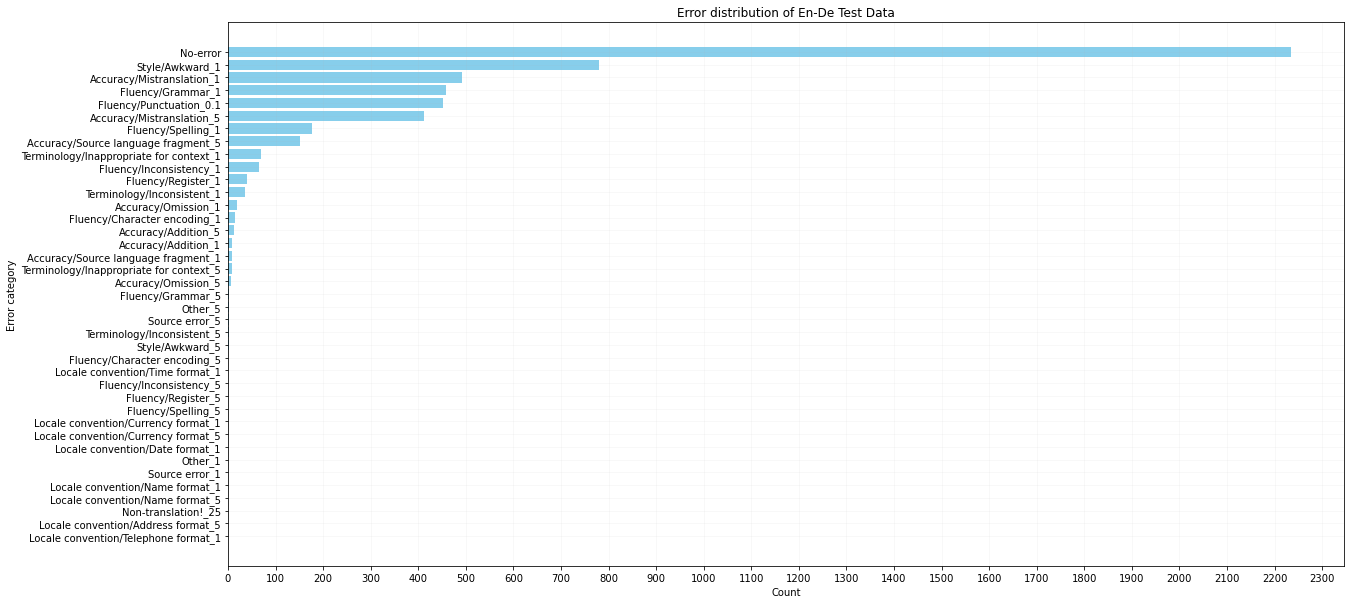

In [6]:
import matplotlib.pyplot as plt

# Ende test set error distribution
ed_res = {key.replace("category_", ''): value for key, value in ed_res.items()}
ed_res = dict(sorted(ed_res.items(), key=lambda item: item[1], reverse=True))
plt.figure(figsize=(20, 10))
plt.barh(list(ed_res.keys()), list(ed_res.values()), color='skyblue')
plt.xticks(range(0, 2301, 100))
plt.grid(True, alpha=0.1, zorder=0)
plt.xlabel('Count')
plt.ylabel('Error category')
plt.title('Error distribution of En-De Test Data')
plt.gca().invert_yaxis()  # Invert the y-axis to display labels from top to bottom
plt.show()

In [17]:
ed_res

{'No-error': 2234,
 'Style/Awkward_1': 780,
 'Accuracy/Mistranslation_1': 491,
 'Fluency/Grammar_1': 458,
 'Fluency/Punctuation_0.1': 451,
 'Accuracy/Mistranslation_5': 413,
 'Fluency/Spelling_1': 177,
 'Accuracy/Source language fragment_5': 152,
 'Terminology/Inappropriate for context_1': 70,
 'Fluency/Inconsistency_1': 66,
 'Fluency/Register_1': 41,
 'Terminology/Inconsistent_1': 36,
 'Accuracy/Omission_1': 18,
 'Fluency/Character encoding_1': 14,
 'Accuracy/Addition_5': 12,
 'Accuracy/Addition_1': 9,
 'Accuracy/Source language fragment_1': 9,
 'Terminology/Inappropriate for context_5': 9,
 'Accuracy/Omission_5': 6,
 'Fluency/Grammar_5': 3,
 'Other_5': 3,
 'Source error_5': 3,
 'Terminology/Inconsistent_5': 3,
 'Style/Awkward_5': 2,
 'Fluency/Character encoding_5': 1,
 'Locale convention/Time format_1': 1,
 'Fluency/Inconsistency_5': 0,
 'Fluency/Register_5': 0,
 'Fluency/Spelling_5': 0,
 'Locale convention/Currency format_1': 0,
 'Locale convention/Currency format_5': 0,
 'Locale co

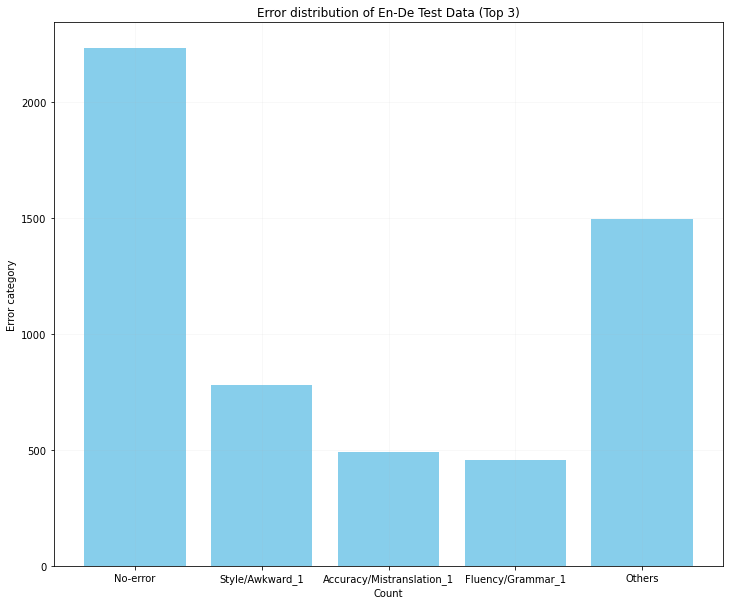

In [31]:
top_items = dict(list(ed_res.items())[:4])
aggregated_value = sum(list(ed_res.values())[4:])
top_items['Others'] = aggregated_value

plt.figure(figsize=(12, 10))
plt.bar(list(top_items.keys()), list(top_items.values()), color='skyblue')
plt.xticks(rotation=0)
plt.grid(True, alpha=0.1, zorder=0)
plt.xlabel('Count')
plt.ylabel('Error category')
plt.title('Error distribution of En-De Test Data (Top 3)')
plt.savefig('ende_error_distribution.png', facecolor='w')
plt.show()

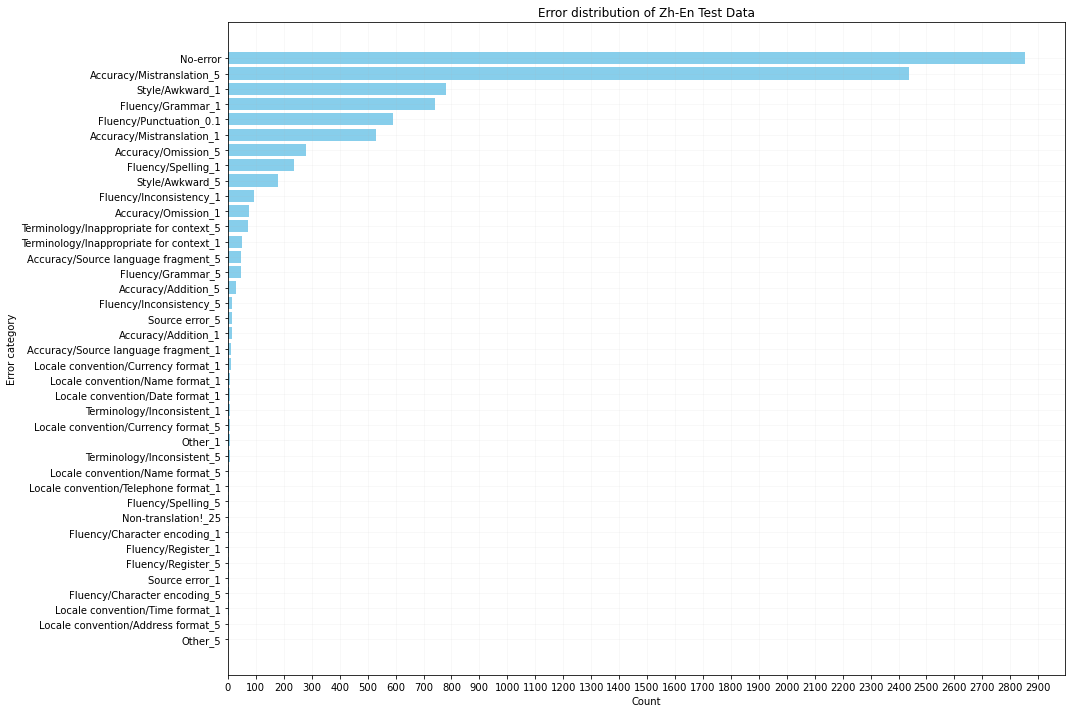

In [24]:
# Zhen test set error distribution
ze_res = {key.replace("category_", ''): value for key, value in ze_res.items()}
ze_res = dict(sorted(ze_res.items(), key=lambda item: item[1], reverse=True))
plt.figure(figsize=(20, 10))
plt.barh(list(ze_res.keys()), list(ze_res.values()), color='skyblue')
plt.xticks(range(0, 2901, 100))
plt.grid(True, alpha=0.1, zorder=0)
plt.xlabel('Count')
plt.ylabel('Error category')
plt.title('Error distribution of Zh-En Test Data')
plt.gca().invert_yaxis()  # Invert the y-axis to display labels from top to bottom
plt.show()

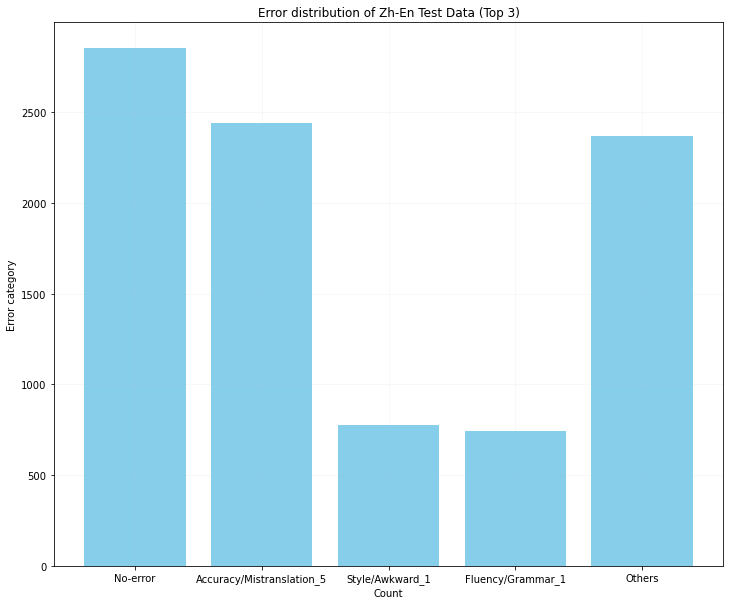

In [16]:
top_zhen = dict(list(ze_res.items())[:4])
aggr_zhen = sum(list(ze_res.values())[4:])
top_zhen['Others'] = aggr_zhen

plt.figure(figsize=(12, 10))
plt.bar(list(top_zhen.keys()), list(top_zhen.values()), color='skyblue')
plt.xticks(rotation=0)
plt.grid(True, alpha=0.1, zorder=0)
plt.xlabel('Count')
plt.ylabel('Error category')
plt.title('Error distribution of Zh-En Test Data (Top 3)')
plt.savefig('zhen_error_distribution.png', facecolor='w')
plt.show()

================ Full Dataset ======================

In [4]:
raw_train_df = pd.read_csv("train_df.csv")
raw_val_df = pd.read_csv("validation_df.csv")
raw_test_df = pd.read_csv("test_df.csv")

ende_train_df = raw_train_df.iloc[:16367]
zhen_train_df = raw_train_df.iloc[16368:]
ende_val_df = raw_val_df.iloc[:5456]
zhen_val_df = raw_val_df.iloc[5657:]
ende_test_df = raw_test_df.iloc[:5456]
zhen_test_df = raw_test_df.iloc[5457:]

In [5]:
raw_ende_df = pd.concat([ende_train_df, ende_val_df, ende_test_df], ignore_index=True)
raw_ende_df = raw_ende_df.drop(columns = ['category_No-error'])
error_columns = [col for col in raw_ende_df.columns if col.startswith('category_')]
all_ende_df = pd.get_dummies(raw_ende_df, columns=error_columns, prefix=error_columns)

columns_to_drop = [col for col in all_ende_df.columns if col.endswith('0')]
all_ende_df.drop(columns=columns_to_drop, inplace=True)
all_ende_df

,source,seg_id,target,doc_id,system,doc,rater,severity,mqm_score,category_Accuracy/Addition_1,...,category_Locale convention/Time format_1,category_Other_1,category_Other_5,category_Source error_5,category_Style/Awkward_1,category_Style/Awkward_5,category_Terminology/Inappropriate for context_1,category_Terminology/Inappropriate for context_5,category_Terminology/Inconsistent_1,category_Terminology/Inconsistent_5
0,In you r acclount says that its only link ( si...,75,"In Ihrem Konto steht, dass der einzige Link (A...",2,refB,conversation_en_de_CLIENT-02_default_2021-01-3...,rater2,No-error,0.0,0,...,0,0,0,0,0,0,0,0,0,0
1,"According to the official, ""relations between ...",901,Laut dem Beamten „sind die Beziehungen zwische...,4,Online-Y,news_rt.com.18637:English-German,rater6,No-error,0.0,0,...,0,0,0,0,0,0,0,0,0,0
2,I will be more than happy to assist you.,101,"<v>Ich werde mehr als glücklich sein</v>, Ihne...",2,Online-A,conversation_en_de_CLIENT-02_default_2021-02-0...,rater4,major,5.0,0,...,0,0,0,0,0,1,0,0,0,0
3,France reacts to rival offer of US frigates to...,878,Frankreich reagiert auf konkurrierendes Angebo...,1,Online-A,news_rt.com.18606:English-German,rater1,No-error,0.0,0,...,0,0,0,0,0,0,0,0,0,0
4,"""Interview with the Vampire"" was made into a s...",710,<unk>Interview with the Vampire<unk> wurde 199...,5,Lan-Bridge,news_cnn.81799:English-German,rater6,minor,1.0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27274,Germany's regulator has suspended the approval...,809,Deutschlands Regulierungsbehörde hat das Geneh...,6,Lan-Bridge,news_independent.80454:English-German,rater1,No-error,0.0,0,...,0,0,0,0,0,0,0,0,0,0
27275,Move the trailer!,1186,Bewegen Sie den Anhänger!,1,Lan-Bridge,social_t3_qdm51k:English-German,rater6,No-error,0.0,0,...,0,0,0,0,0,0,0,0,0,0
27276,A rollercoaster first half ended with Munster ...,920,Eine Achterbahnfahrt der ersten Halbzeit endet...,3,JDExploreAcademy,news_rte.en.ie.26304:English-German,rater3,major,5.0,0,...,0,0,0,0,0,0,0,0,0,0
27277,"Best way to lose a new young worker, by shocki...",1034,Der beste Weg einen neuen jungen Arbeiter zu v...,9,bleurt_bestmbr,social_t1_hkc5no1:English-German,rater1,No-error,0.0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
raw_zhen_df = pd.concat([zhen_train_df, zhen_val_df, zhen_test_df], ignore_index=True)
raw_zhen_df = raw_zhen_df.drop(columns = ['category_No-error'])
error_columns = [col for col in raw_zhen_df.columns if col.startswith('category_')]
all_zhen_df = pd.get_dummies(raw_zhen_df, columns=error_columns, prefix=error_columns)

columns_to_drop = [col for col in all_zhen_df.columns if col.endswith('0')]
all_zhen_df.drop(columns=columns_to_drop, inplace=True)
all_zhen_df

,source,seg_id,target,doc_id,system,doc,rater,severity,mqm_score,category_Accuracy/Addition_1,...,category_Terminology/Inappropriate for context_1,category_Terminology/Inappropriate for context_5,category_Terminology/Inconsistent_1,category_Terminology/Inconsistent_5,category_Locale convention/Name format_1,category_Locale convention/Name format_5,category_Non-translation!_25,category_Locale convention/Address format_1,category_Locale convention/Address format_5,category_Locale convention/Telephone format_1
0,"别看脸书现在非常的风光，每年也有1,000亿到2,000亿美元的收入，实际上脸书现在危机感非...",426,Despite the fact that Facebook is now very <v>...,26,HuaweiTSC.en,social_social_zh_linkedin.com_39643915:Chinese...,rater2,major,5.0,0,...,0,0,0,0,0,0,0,0,0,0
1,因此，破除落后观念，普及法律常识，也有助于根治拐卖、收买儿童犯罪。,355,"Therefore, getting rid of backward concepts an...",30,LanguageX.en,news_xinhua-zh-01.104266:Chinese-English,rater3,No-error,0.0,0,...,0,0,0,0,0,0,0,0,0,0
2,感谢亲的五星好评哦，爱你么么哒！,129,"Thank you for your five-star praise, love you!!",3,HuaweiTSC.en,ecommerce_ecommerce_zh_dianping.com_85923960:C...,rater2,No-error,0.0,0,...,0,0,0,0,0,0,0,0,0,0
3,这是海湾合作委员会重新评估为促进恢复海合会统一作出贡献的外交成果的机会，同时提出各项措施，使...,245,This is the opportunity for the Gulf Cooperati...,21,refA.en,news_nhan_dan-zh.8720:Chinese-English,rater2,minor,1.0,0,...,0,0,0,0,0,0,0,0,0,0
4,伦理学历史包括希腊罗马伦理学、中世纪基督教伦理学。,395,Ethics history includes Greek Roman ethics and...,16,M2M100_1.2B-B4.en,social_social_zh_douban.com_97181248:Chinese-E...,rater3,No-error,0.0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46264,“最好原则”的最大问题在于门槛太高，它往往超越了普通人的能力极限，让绝大多数人“望门兴叹” 。,371,The biggest problem with the “best principle” ...,11,bleurt_bestmbr.en,news_xinhua-zh-01.104255:Chinese-English,rater6,minor,0.1,0,...,0,0,0,0,0,0,0,0,0,0
46265,去之前看了店里的拍摄作品，更多的是户外婚纱，拍的很漂亮，涉及到的拍摄风格也很多。,176,"Before I went there, I saw the shooting works ...",3,bleu_bestmbr.en,ecommerce_ecommerce_zh_meituan.com_166272631:C...,rater7,major,5.0,0,...,0,0,0,0,0,0,0,0,0,0
46266,马三立先生那段著名的《从明天开始》的相声，就是最传神地表现了这一“普遍人性”的经典。,370,Mr. Ma Sanli's famous comic “Starting Tomorrow...,10,Online-Y.en,news_xinhua-zh-01.104255:Chinese-English,rater6,major,5.0,0,...,0,0,0,0,0,0,0,0,0,0
46267,他同时认为，数字化转型需驱动向纵深发展和可持续发展，参与新冠肺炎疫情防控、经济复苏和发展、应...,251,He also believes that digital transformation n...,12,bleu_bestmbr.en,news_nhan_dan-zh.8742:Chinese-English,rater3,major,5.0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
ed_all_res = label_distribution(all_ende_df)
ed_all_res['category_No-error'] = len(all_ende_df[all_ende_df["severity"] == "No-error"])
ed_all_res = {key.replace("category_", ''): value for key, value in ed_all_res.items()}
ed_all_res = dict(sorted(ed_all_res.items(), key=lambda item: item[1], reverse=True))

ze_all_res = label_distribution(all_zhen_df)
ze_all_res['category_No-error'] = len(all_zhen_df[all_zhen_df["severity"] == "No-error"])
ze_all_res = {key.replace("category_", ''): value for key, value in ze_all_res.items()}
ze_all_res = dict(sorted(ze_all_res.items(), key=lambda item: item[1], reverse=True))

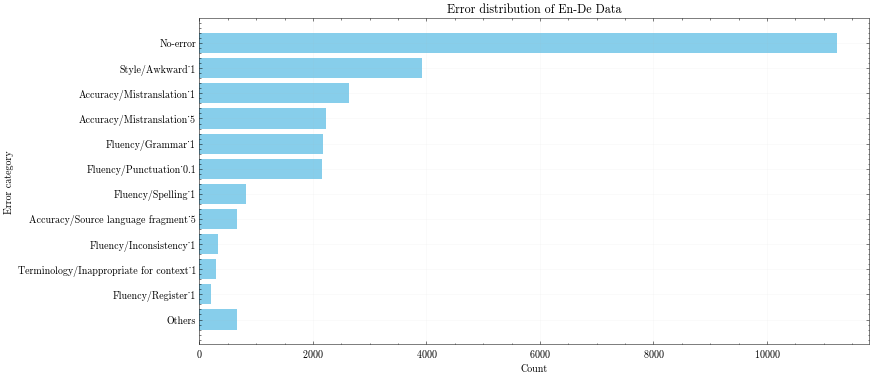

In [16]:
top_all_ende = dict(list(ed_all_res.items())[:11])
aggr_all_ende = sum(list(ed_all_res.values())[11:])
top_all_ende['Others'] = aggr_all_ende

plt.figure(figsize=(12, 6))
plt.barh(list(top_all_ende.keys()), list(top_all_ende.values()), color='skyblue')
plt.xticks(rotation=0)
plt.grid(True, alpha=0.1, zorder=0)
plt.xlabel('Count')
plt.ylabel('Error category')
plt.title('Error distribution of En-De Data')
plt.gca().invert_yaxis()
plt.savefig('ende_all_error_distribution.pdf', bbox_inches='tight', facecolor='w')
plt.show()

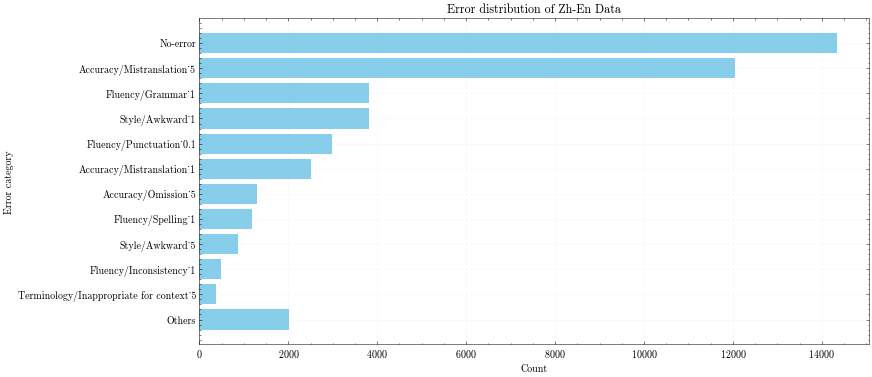

In [15]:
top_all_zhen = dict(list(ze_all_res.items())[:11])
aggr_all_zhen = sum(list(ze_all_res.values())[11:])
top_all_zhen['Others'] = aggr_all_zhen

plt.figure(figsize=(12, 6))
plt.barh(list(top_all_zhen.keys()), list(top_all_zhen.values()), color='skyblue')
plt.xticks(rotation=0)
plt.grid(True, alpha=0.1, zorder=0)
plt.xlabel('Count')
plt.ylabel('Error category')
plt.title('Error distribution of Zh-En Data')
plt.gca().invert_yaxis()
plt.savefig('zhen_all_error_distribution.pdf', facecolor='w')
plt.show()

========== Regression error analysis ==============

In [21]:
multi_reg_end_df = pd.read_csv("multi-reg-ende-pred.csv")
multi_reg_end_df

,Unnamed: 0,Source,Target,Score,Prediction
0,0,Iran reports lowest number of daily COVID-19 c...,Iran meldet<v> niedrigste</v> Zahl an tägliche...,1.0,[1.22448895]
1,1,If the book still has issues to open after syn...,Falls das Buch nach der Synchronisation im E-R...,0.0,[-0.06071904]
2,2,"""Russia should be in no doubt that further mil...","""Russland sollte keinen Zweifel daran haben, d...",0.1,[0.26329053]
3,3,"I do apologise about this, as the account hold...","Ich entschuldige mich dafür, da der Kontoinhab...",1.0,[1.60824295]
4,4,"Beside 'Repair your #PRS_ORG# account', tap Re...","Neben ""Reparieren Sie Ihr # PRS _ ORG # -Konto...",1.0,[0.26479187]
...,...,...,...,...,...
5451,5451,Germany's regulator has suspended the approval...,Deutschlands Regulierungsbehörde hat das Geneh...,0.0,[-0.06567068]
5452,5452,Move the trailer!,Bewegen Sie den Anhänger!,0.0,[-0.2854812]
5453,5453,A rollercoaster first half ended with Munster ...,Eine Achterbahnfahrt der ersten Halbzeit endet...,5.0,[2.70150844]
5454,5454,"Best way to lose a new young worker, by shocki...",Der beste Weg einen neuen jungen Arbeiter zu v...,0.0,[-0.10315849]


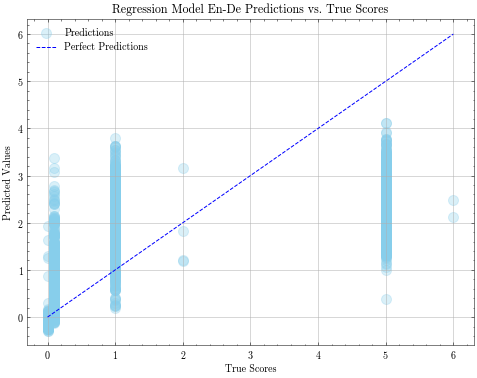

In [23]:
true_scores = multi_reg_end_df["Score"]
predicted_values = multi_reg_end_df["Prediction"].str[1:-1].astype(float)

plt.figure(figsize=(8, 6))
plt.scatter(true_scores, predicted_values, c='skyblue', label='Predictions', s=100, alpha=0.3)

# Add a diagonal line for reference (perfect predictions)
plt.plot([min(true_scores), max(true_scores)], [min(true_scores), max(true_scores)], 'b--', label='Perfect Predictions')

# Customize the plot
plt.xlabel('True Scores')
plt.ylabel('Predicted Values')
plt.title('Regression Model En-De Predictions vs. True Scores')
plt.legend()
plt.grid(True)
plt.savefig("reg-ende-pred-plot.pdf", facecolor='w')
plt.show()

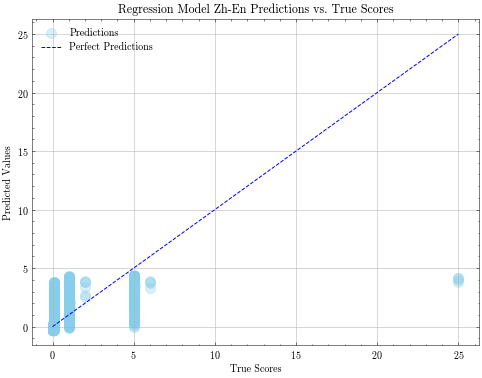

In [27]:
multi_reg_ze_df = pd.read_csv("multi-reg-zhen-pred.csv")

true_scores = multi_reg_ze_df["Score"]
predicted_values = multi_reg_ze_df["Prediction"].str[1:-1].astype(float)

plt.figure(figsize=(8, 6))
plt.scatter(true_scores, predicted_values, c='skyblue', label='Predictions', s=100, alpha=0.3)

# Add a diagonal line for reference (perfect predictions)
plt.plot([min(true_scores), max(true_scores)], [min(true_scores), max(true_scores)], 'b--', label='Perfect Predictions')

# Customize the plot
plt.xlabel('True Scores')
plt.ylabel('Predicted Values')
plt.title('Regression Model Zh-En Predictions vs. True Scores')
plt.legend()
plt.grid(True)
plt.savefig("reg-zhen-pred-plot.pdf", facecolor='w')
plt.show()

In [28]:
multi_class_df = pd.read_csv("multi-classification-pred.csv")
ende_classpred_df = multi_class_df.iloc[:5456]
zhen_classpred_df = multi_class_df.iloc[5457:]

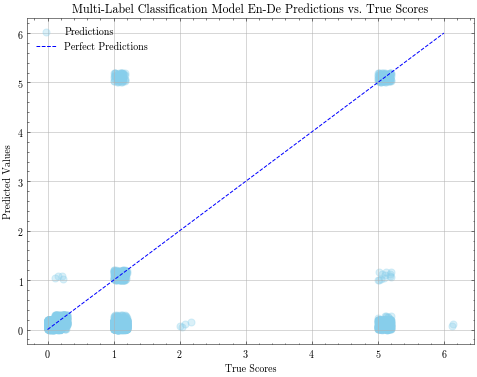

In [29]:
true_scores = ende_classpred_df["mqm_score"]
predicted_values = ende_classpred_df["Score"].astype(float)

jitter = 0.2  # Adjust the jitter amount as needed

true_scores_jittered = true_scores + jitter * np.random.rand(len(true_scores))
predicted_values_jittered = predicted_values + jitter * np.random.rand(len(predicted_values))

plt.figure(figsize=(8, 6))
plt.scatter(true_scores_jittered, predicted_values_jittered, c='skyblue', label='Predictions', s=50, alpha=0.3)

# Add a diagonal line for reference (perfect predictions)
plt.plot([min(true_scores), max(true_scores)], [min(true_scores), max(true_scores)], 'b--', label='Perfect Predictions')

# Customize the plot
plt.xlabel('True Scores')
plt.ylabel('Predicted Values')
plt.title('Multi-Label Classification Model En-De Predictions vs. True Scores')
plt.legend()
plt.grid(True)
plt.savefig("class-ende-pred-plot.pdf", facecolor='w')
plt.show()

# plt.figure(figsize=(8, 6))
# plt.scatter(true_scores, predicted_values, c='skyblue', label='Predictions', s=100, alpha=0.1)

# # Add a diagonal line for reference (perfect predictions)
# plt.plot([min(true_scores), max(true_scores)], [min(true_scores), max(true_scores)], 'b--', label='Perfect Predictions')

# # Customize the plot
# plt.xlabel('True Scores')
# plt.ylabel('Predicted Values')
# plt.title('Multi-Label Classification Model En-De Predictions vs. True Scores')
# plt.legend()
# plt.grid(True)
# plt.savefig("class-ende-pred-plot.png")
# plt.show()

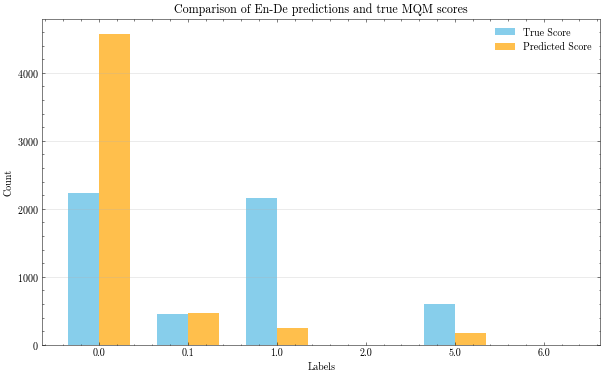

In [30]:
ende_true_count = ende_classpred_df["mqm_score"].value_counts()
ende_pred_count = ende_classpred_df["Score"].astype(float).value_counts()

all_ende_labels = ende_true_count.index.union(ende_pred_count.index)
true_ende_labels = ende_true_count.reindex(all_ende_labels, fill_value=0)
ende_predictions = ende_pred_count.reindex(all_ende_labels, fill_value=0)

bar_width = 0.35
index = np.arange(len(all_ende_labels))

plt.figure(figsize=(10, 6))
plt.bar(index, true_ende_labels, bar_width, label='True Score', color='skyblue')
plt.bar(index + bar_width, ende_predictions, bar_width, label='Predicted Score', color='orange', alpha=0.7)

# Customize the plot
plt.xlabel('Labels')
plt.ylabel('Count')
plt.title('Comparison of En-De predictions and true MQM scores')
plt.xticks(index + bar_width / 2, all_ende_labels)
plt.legend()
plt.grid(axis='y', alpha=0.5)
plt.savefig("ende_pred_bar.pdf", facecolor='w')
plt.show()

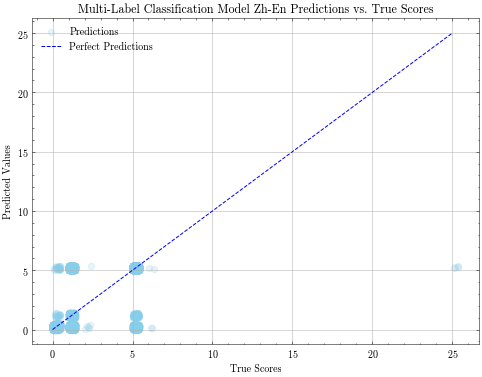

In [31]:
true_scores = zhen_classpred_df["mqm_score"]
predicted_values = zhen_classpred_df["Score"].astype(float)

jitter = 0.4  # Adjust the jitter amount as needed

true_scores_jittered = true_scores + jitter * np.random.rand(len(true_scores))
predicted_values_jittered = predicted_values + jitter * np.random.rand(len(predicted_values))

plt.figure(figsize=(8, 6))
plt.scatter(true_scores_jittered, predicted_values_jittered, c='skyblue', label='Predictions', s=40, alpha=0.2)

# Add a diagonal line for reference (perfect predictions)
plt.plot([min(true_scores), max(true_scores)], [min(true_scores), max(true_scores)], 'b--', label='Perfect Predictions')

# Customize the plot
plt.xlabel('True Scores')
plt.ylabel('Predicted Values')
plt.title('Multi-Label Classification Model Zh-En Predictions vs. True Scores')
plt.legend()
plt.grid(True)
plt.savefig("class-zhen-pred-plot.pdf", facecolor='w')
plt.show()

In [32]:
zhen_true_count = zhen_classpred_df["mqm_score"].value_counts()
zhen_pred_count = zhen_classpred_df["Score"].astype(float).value_counts()

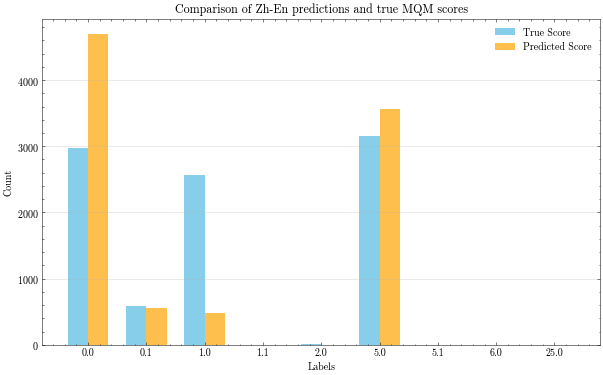

In [34]:
import numpy as np

all_labels = zhen_true_count.index.union(zhen_pred_count.index)
true_labels = zhen_true_count.reindex(all_labels, fill_value=0)
predictions = zhen_pred_count.reindex(all_labels, fill_value=0)

bar_width = 0.35
index = np.arange(len(all_labels))

plt.figure(figsize=(10, 6))
plt.bar(index, true_labels, bar_width, label='True Score', color='skyblue')
plt.bar(index + bar_width, predictions, bar_width, label='Predicted Score', color='orange', alpha=0.7)

# Customize the plot
plt.xlabel('Labels')
plt.ylabel('Count')
plt.title('Comparison of Zh-En predictions and true MQM scores')
plt.xticks(index + bar_width / 2, all_labels)
plt.legend()
plt.grid(axis='y', alpha=0.5)
plt.savefig("zhen_pred_bar.pdf", facecolor='w')
plt.show()

In [100]:
def string_to_float_list(s):
    return [float(val) for val in s.strip('][').split(', ')]

zhen_true_values = zhen_classpred_df["Labels"].apply(string_to_float_list)
zhen_predicted_values = zhen_classpred_df["Prediction"].apply(string_to_float_list)
zhen_class_pred_df = pd.concat([zhen_true_values, zhen_predicted_values], axis = 1)

ende_true_values = ende_classpred_df["Labels"].apply(string_to_float_list)
ende_predicted_values = ende_classpred_df["Prediction"].apply(string_to_float_list)
ende_class_pred_df = pd.concat([ende_true_values, ende_predicted_values], axis = 1)

In [103]:
ende_misclassification_count = {}
ende_less = 0
ende_too_much = 0

for i in range(40):
    ende_misclassification_count[i] = 0

for index, row in ende_class_pred_df.iterrows():
    if (row["Labels"] != row["Prediction"]):
        for i in range(40):
            if (row["Labels"][i] != row["Prediction"][i]):
                ende_misclassification_count[i] += 1
                if (row["Labels"][i] < row["Prediction"][i]):
                    ende_too_much += 1
                else:
                    ende_less += 1

In [101]:
zhen_misclassification_count = {}
zhen_less = 0
zhen_too_much = 0

for i in range(40):
    zhen_misclassification_count[i] = 0

for index, row in zhen_class_pred_df.iterrows():
    if (row["Labels"] != row["Prediction"]):
        for i in range(40):
            if (row["Labels"][i] != row["Prediction"][i]):
                zhen_misclassification_count[i] += 1
                if (row["Labels"][i] < row["Prediction"][i]):
                    zhen_too_much += 1
                else:
                    zhen_less += 1

In [94]:
errors = ['category_Accuracy/Addition_1',
 'category_Accuracy/Addition_5',
 'category_Accuracy/Mistranslation_1',
 'category_Accuracy/Mistranslation_5',
 'category_Accuracy/Omission_1',
 'category_Accuracy/Omission_5',
 'category_Accuracy/Source language fragment_1',
 'category_Accuracy/Source language fragment_5',
 'category_Fluency/Character encoding_1',
 'category_Fluency/Character encoding_5',
 'category_Fluency/Grammar_1',
 'category_Fluency/Grammar_5',
 'category_Fluency/Inconsistency_1',
 'category_Fluency/Inconsistency_5',
 'category_Fluency/Punctuation_0.1',
 'category_Fluency/Register_1',
 'category_Fluency/Register_5',
 'category_Fluency/Spelling_1',
 'category_Fluency/Spelling_5',
 'category_Locale convention/Currency format_1',
 'category_Locale convention/Currency format_5',
 'category_Locale convention/Date format_1',
 'category_Locale convention/Date format_5',
 'category_Locale convention/Time format_1',
 'category_Other_1',
 'category_Other_5',
 'category_Source error_1',
 'category_Source error_5',
 'category_Style/Awkward_1',
 'category_Style/Awkward_5',
 'category_Terminology/Inappropriate for context_1',
 'category_Terminology/Inappropriate for context_5',
 'category_Terminology/Inconsistent_1',
 'category_Terminology/Inconsistent_5',
 'category_Locale convention/Name format_1',
 'category_Locale convention/Name format_5',
 'category_Non-translation!_25',
 'category_Locale convention/Address format_1',
 'category_Locale convention/Address format_5',
 'category_Locale convention/Telephone format_1']
id2label = {idx:label for idx, label in enumerate(errors)}
label2id = {label:idx for idx, label in enumerate(errors)}

In [104]:
ende_count = {id2label[key]: value for key, value in ende_misclassification_count.items()}
ende_count = {k: v for k, v in sorted(ende_count.items(), key=lambda item: item[1], reverse=True)}
ende_count

{'category_Source error_5': 780,
 'category_Accuracy/Mistranslation_1': 491,
 'category_Fluency/Grammar_1': 403,
 'category_Accuracy/Mistranslation_5': 390,
 'category_Fluency/Spelling_1': 177,
 'category_Accuracy/Source language fragment_5': 152,
 'category_Fluency/Punctuation_0.1': 149,
 'category_Style/Awkward_5': 70,
 'category_Fluency/Inconsistency_1': 66,
 'category_Fluency/Register_1': 41,
 'category_Terminology/Inappropriate for context_5': 36,
 'category_Accuracy/Omission_1': 18,
 'category_Fluency/Character encoding_1': 14,
 'category_Accuracy/Addition_5': 12,
 'category_Accuracy/Addition_1': 9,
 'category_Accuracy/Source language fragment_1': 9,
 'category_Terminology/Inappropriate for context_1': 9,
 'category_Accuracy/Omission_5': 6,
 'category_Fluency/Grammar_5': 3,
 'category_Other_1': 3,
 'category_Source error_1': 3,
 'category_Terminology/Inconsistent_1': 3,
 'category_Style/Awkward_1': 2,
 'category_Fluency/Character encoding_5': 1,
 'category_Locale convention/Date 

In [105]:
ende_too_much, ende_less

(254, 2594)

In [106]:
zhen_count = {id2label[key]: value for key, value in zhen_misclassification_count.items()}
zhen_count = {k: v for k, v in sorted(zhen_count.items(), key=lambda item: item[1], reverse=True)}
zhen_count

{'category_Accuracy/Mistranslation_5': 1695,
 'category_Source error_5': 779,
 'category_Fluency/Grammar_1': 616,
 'category_Accuracy/Mistranslation_1': 529,
 'category_Fluency/Spelling_1': 235,
 'category_Style/Awkward_1': 180,
 'category_Fluency/Punctuation_0.1': 155,
 'category_Accuracy/Omission_5': 96,
 'category_Fluency/Inconsistency_1': 94,
 'category_Accuracy/Omission_1': 75,
 'category_Terminology/Inappropriate for context_1': 73,
 'category_Style/Awkward_5': 51,
 'category_Accuracy/Source language fragment_5': 48,
 'category_Fluency/Grammar_5': 48,
 'category_Accuracy/Addition_5': 29,
 'category_Fluency/Inconsistency_5': 15,
 'category_Source error_1': 14,
 'category_Accuracy/Addition_1': 13,
 'category_Accuracy/Source language fragment_1': 11,
 'category_Locale convention/Currency format_1': 10,
 'category_Terminology/Inconsistent_5': 8,
 'category_Locale convention/Date format_1': 7,
 'category_Terminology/Inappropriate for context_5': 7,
 'category_Locale convention/Currenc

In [107]:
zhen_too_much, zhen_less

(1557, 3284)

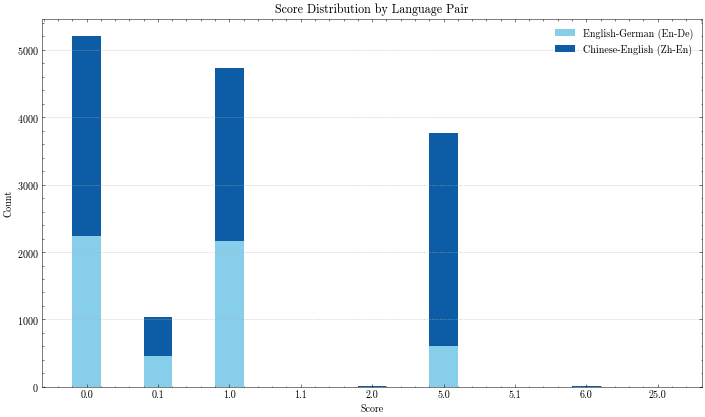

In [20]:
# Data
scores = [0.0, 0.1, 1.0, 1.1, 2.0, 5.0, 5.1, 6.0, 25.0]
english_german = [2234, 451, 2160, 0, 4, 605, 0, 2, 0]
chinese_english = [2968, 589, 2564, 2, 6, 3156, 1, 4, 4]

fig, ax = plt.subplots(figsize=(10, 6))

# Plot the data
bar_width = 0.4
index = np.arange(len(scores))
# index = range(len(scores))
bar1 = plt.bar(index, english_german, bar_width, label='English-German (En-De)', color='skyblue')
bar2 = plt.bar(index, chinese_english, bar_width, label='Chinese-English (Zh-En)', bottom=english_german)

# Set labels and title
plt.xlabel('Score')
plt.ylabel('Count')
plt.title('Score Distribution by Language Pair')
plt.xticks(index, scores)
plt.legend()

# Show the plot
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig('score_dist.pdf', facecolor='w')
plt.show()